In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical

In [2]:
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
# # 將 28*28 圖片轉換成 784 的向量(MLP)
# X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
# X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
# print("X_train Shape: ", X_train.shape)
# print("X_test Shape: ", X_test.shape)

In [4]:
# 將圖片轉換成 4D 張量(CNN)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (60000, 28, 28, 1)
X_test Shape:  (10000, 28, 28, 1)


In [5]:
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
print(X_train[0][150:175])

[]


In [6]:
# One-hot編碼
Y_test_bk = Y_test.copy()
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("Y_train Shape: ", Y_train.shape)
print(Y_train[0])

Y_train Shape:  (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# # 定義模型(MLP)
# model = Sequential()
# model.add(Dense(28*21, input_dim=28*28, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(28*14, activation="relu"))
# model.add(Dense(10, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊

In [8]:
# 定義模型(CNN)
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), padding="same",
                 input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [9]:
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,epochs=20, batch_size=128, shuffle=True)

Epoch 1/20
375/375 [==============================] - 3s 2ms/step - loss: 0.4034 - accuracy: 0.8704 - val_loss: 0.0863 - val_accuracy: 0.9752
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1330 - accuracy: 0.9598 - val_loss: 0.0635 - val_accuracy: 0.9802
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9692 - val_loss: 0.0519 - val_accuracy: 0.9837
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9748 - val_loss: 0.0447 - val_accuracy: 0.9868
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9765 - val_loss: 0.0409 - val_accuracy: 0.9886
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9792 - val_loss: 0.0380 - val_accuracy: 0.9883
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0603 - accuracy: 0.9819 - val_loss: 0.0339 - val_accuracy: 0.9909
Epoch 

In [11]:
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))


Testing ...
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0111 - accuracy: 0.9970: 0s - loss: 0.0100 - accuracy: 0.
訓練資料集的準確度 = 1.00
313/313 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9950
測試資料集的準確度 = 1.00


In [12]:
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt

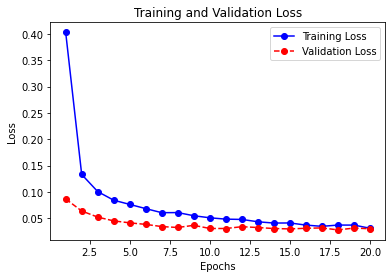

In [13]:
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

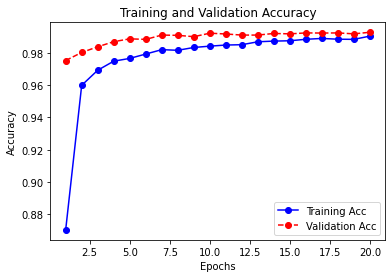

In [14]:
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
import pandas as pd

In [16]:
# 計算分類的預測值
print("\nPredicting ...")
X_pred=model.predict(X_test) 
Y_pred=np.argmax(X_pred,axis=1)
# Y_pred = model.predict_classes(X_test)


Predicting ...


In [17]:
# 顯示混淆矩陣
tb = pd.crosstab(Y_test_bk.astype(int), Y_pred.astype(int), rownames=["label"], colnames=["predict"])
print(tb)

predict    0     1     2     3    4    5    6     7    8     9
label                                                         
0        976     0     0     0    0    0    2     1    1     0
1          0  1133     1     0    0    1    0     0    0     0
2          1     0  1025     0    1    0    0     3    2     0
3          0     0     1  1006    0    1    0     0    1     1
4          0     0     0     0  979    0    0     0    0     3
5          1     0     0     3    0  885    1     0    0     2
6          4     2     0     0    1    1  950     0    0     0
7          0     3     1     0    0    0    0  1022    0     2
8          1     0     1     0    0    0    0     0  971     1
9          0     0     0     0    5    1    0     0    0  1003


In [18]:
# 選一個測試的數字圖片
i = np.random.randint(0, len(X_test))
digit = X_test[i].reshape(28, 28)

In [19]:
# 將圖片轉換成 4D 張量
X_test_digit = X_test[i].reshape(1, 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_digit = X_test_digit / 255

(-0.5, 27.5, 27.5, -0.5)

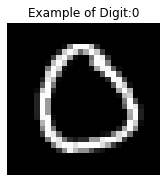

In [20]:
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Digit:" + str(Y_test_bk[i]))
plt.imshow(digit, cmap="gray")
plt.axis("off")

Predicting ...


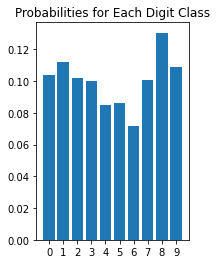

In [21]:
# 預測結果的機率
from sklearn import preprocessing
print("Predicting ...")
probs=model.predict(X_test_digit)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()